# IMPORTS AND STYLE CONFIGURATIONS

In [1]:
import pandas as pd
import numpy as np
import itertools

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams.update({'font.size': 14})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# USER INPUTS

# Constants

In [3]:
ro = 900 # kg/m3
rpm = 200
w = 2*np.pi*rpm/60 #rad/s
r = 0.025 #m

## K Parameter

In [4]:
iniK = 1 # Initial value of K
finK = 50 # Final value of K
ptsK = 60 # Number of discretization points (between initial and final)

fixK = 5 # Pa*s^n, Fixed value of K when other variables are being analyzed

In [5]:
iniTau = 1 # Initial value of Tau0
finTau = 50 # Final value of Tau0
ptsTau = 60 # Number of discretization points (between initial and final)

fixTau = 5 # Pa, Fixed value of Tau0 when other variables are being analyzed

In [6]:
inin = 0.5 # Initial value of n
finn = 0.9 # Final value of n
ptsn = 3 # Number of discretization points (between initial and final)

fixn = 0.5 # -, Fixed value of Tau0 when other variables are being analyzed

# CODE

## USER SUPPOSED TO NOT CHANGE ANY OF ABOVE

In [7]:
mK = np.linspace(iniK, finK, ptsK)
if fixK not in (mK):
    mK = sorted(np.append(mK,fixK))

In [8]:
mTau = np.linspace(iniTau, finTau, ptsTau)
if fixTau not in (mTau):
    mTau = sorted(np.append(mTau,fixTau))

In [9]:
mn = np.linspace(inin, finn, ptsn)
if fixn not in (mn):
    mn = sorted(np.append(mn,fixn))

In [10]:
kgm3 = r'$kg/m^3$'
rolatex = r'$\rho$'
strcte = f'{rolatex} = {ro} {kgm3}, w = {rpm} rpm, r = {r*1000} mm'
stringtau = r'$\tau_0$'

In [11]:
lista = [mTau, mK, mn]
data = list(itertools.product(*lista))

In [12]:
df = pd.DataFrame(data, columns = ['tau', 'K', 'n'])

In [13]:
df['U'] = ( df['tau'] ** (df['n']+1) ) / (ro*r*w**2*df['K']**(1/df['n']))

In [14]:
dftau = df[(df['K']==fixK)]
dfk = df[(df['tau']==fixTau)]

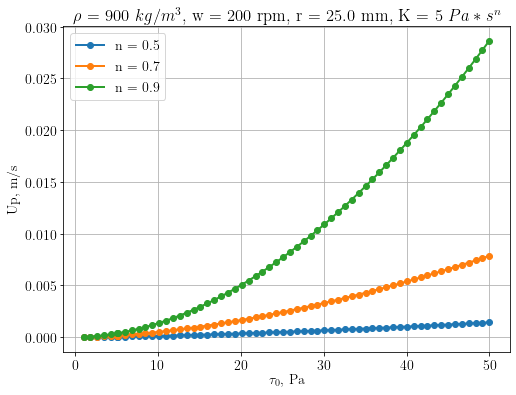

In [15]:
fig, ax = plt.subplots()

for n_chosen in mn:
    dfplot = dftau[dftau['n']==n_chosen]
    ax.plot(dfplot['tau'], dfplot['U'], '-o', label = f'n = {n_chosen}', linewidth='2')
ax.set(xlabel = f'{stringtau},  Pa', ylabel = 'Up, m/s', title = f'{strcte}, K = {fixK} $Pa*s^n$')
ax.legend()
plt.grid()
# fig.savefig(f'Figures\\tau.png', dpi=600)

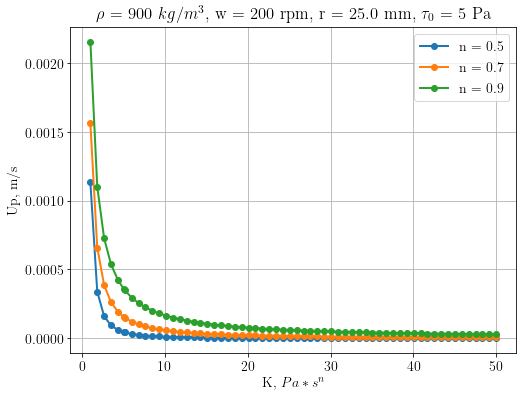

In [16]:
fig, ax = plt.subplots()

for n_chosen in mn:
    dfplot = dfk[dfk['n']==n_chosen]
    ax.plot(dfplot['K'], dfplot['U'], '-o', label = f'n = {n_chosen}', linewidth='2')
ax.set(xlabel = 'K, $Pa*s^n$', ylabel = 'Up, m/s', title = f'{strcte}, {stringtau} = {fixTau} Pa')
ax.legend()
plt.grid()
# fig.savefig(f'Figures\\k.png', dpi=600)

In [17]:
zminimo, zmaximo = 1e6, -1e6
for n_chosen in mn:
    dfn = df[df['n']==n_chosen]
    Z = dfn.pivot_table(index='K', columns='tau', values='U').T.values
    if Z.min()<zminimo:
        zminimo = Z.min()
    if Z.max()>zmaximo:
        zmaximo = Z.max()
        
nomalizacao = colors.LogNorm(vmin=zminimo, vmax=zmaximo)

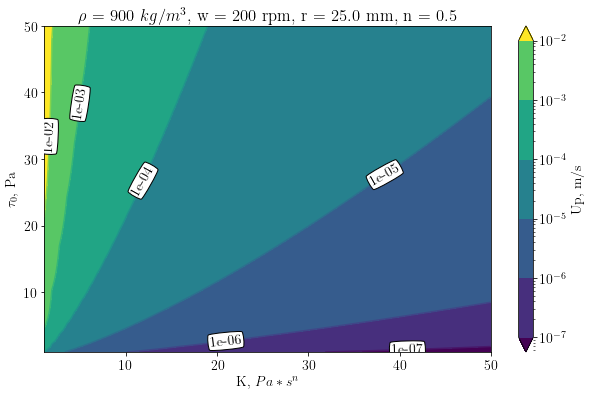

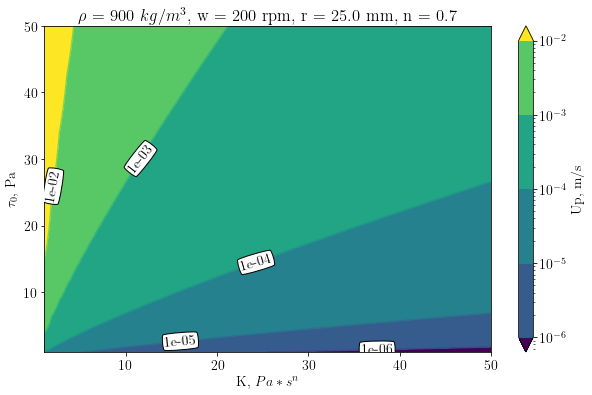

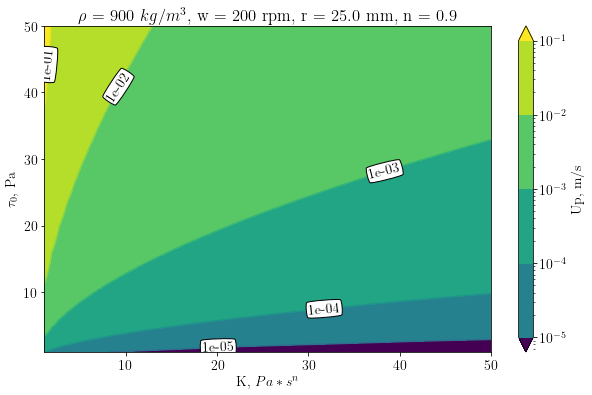

In [18]:
for n_chosen in mn:
    dfn = df[df['n']==n_chosen]
    
    fig, ax = plt.subplots(figsize=(10,6))

    Z = dfn.pivot_table(index='K', columns='tau', values='U').T.values
    
    X_unique = np.sort(dfn['K'].unique())
    Y_unique = np.sort(dfn['tau'].unique())
    X, Y = np.meshgrid(X_unique, Y_unique)
        
    cs1 = ax.contour(X, Y, Z,
                      norm=nomalizacao,
                      cmap='viridis', extend='both')
    
    clabels = ax.clabel(cs1, colors='k', inline_spacing = 0, fmt = '%2.0e', fontsize=14)
    
    [txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0.2, boxstyle='round4', ec='k', lw=1)) for txt in clabels]

    cs2 = ax.contourf(X, Y, Z,
                      norm=nomalizacao,
                      cmap='viridis', extend='both')
    
    cbar = fig.colorbar(cs2, ax=ax)
    cbar.ax.set_ylabel('Up, m/s')
   
    ax.set(xlabel = 'K, $Pa*s^n$', ylabel = f'{stringtau}, Pa', title = f'{strcte}, n = {n_chosen}')
    plt.show()
#     fig.savefig(f'Figures\\map_n0{str(n_chosen)[-1]}.png', dpi=600)